## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()
%matplotlib inline

## Import Data 

In [2]:
df=pd.read_csv("1. Weather Data.csv")

## Read Data

In [3]:
df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [4]:
df.tail()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow
8783,12/31/2012 23:00,0.0,-2.1,86,30,11.3,99.89,Snow


## Explore Data

In [5]:
df.shape

(8784, 8)

In [6]:
df.index

RangeIndex(start=0, stop=8784, step=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [8]:
df.describe()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


In [9]:
df.count()

Date/Time           8784
Temp_C              8784
Dew Point Temp_C    8784
Rel Hum_%           8784
Wind Speed_km/h     8784
Visibility_km       8784
Press_kPa           8784
Weather             8784
dtype: int64

In [10]:
df.nunique()

Date/Time           8784
Temp_C               533
Dew Point Temp_C     489
Rel Hum_%             83
Wind Speed_km/h       34
Visibility_km         24
Press_kPa            518
Weather               50
dtype: int64

In [11]:
df.columns

Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather'],
      dtype='object')

In [12]:
df.dtypes

Date/Time            object
Temp_C              float64
Dew Point Temp_C    float64
Rel Hum_%             int64
Wind Speed_km/h       int64
Visibility_km       float64
Press_kPa           float64
Weather              object
dtype: object

## Clean Data 

In [13]:
mask1=df.isnull().any(axis=0)
mask1.sum()

0

In [14]:
mask2=df.isnull().any(axis=1)
mask2.sum()

0

In [15]:
df.duplicated().sum()

0

In [16]:
import numpy as np

In [17]:
for col_name in df.select_dtypes(include=np.number).columns[:-1]:
    print(col_name)

Temp_C
Dew Point Temp_C
Rel Hum_%
Wind Speed_km/h
Visibility_km


In [18]:
q1 = df[col_name].quantile(0.25)
q3 = df[col_name].quantile(0.75)

In [19]:
iqr = q3 - q1
iqr

0.8999999999999986

In [20]:
low = q1-1.5*iqr
high = q3+1.5*iqr

In [21]:
low

22.750000000000004

In [22]:
high

26.349999999999998

In [23]:
 print("Outliers = ",df.loc[(df[col_name] < low) | (df[col_name] > high), col_name])

Outliers =  0        8.0
1        8.0
2        4.0
3        4.0
4        4.8
        ... 
8779     9.7
8780     9.7
8781     4.8
8782     9.7
8783    11.3
Name: Visibility_km, Length: 3539, dtype: float64


<AxesSubplot:ylabel='Visibility_km'>

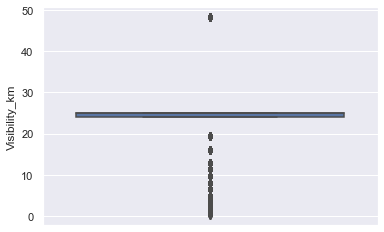

In [24]:
sns.boxplot(y="Visibility_km",data=df)

In [25]:
print("Change the outliers with median ",df[col_name].median())
df.loc[(df[col_name] < low) | (df[col_name] > high), col_name] = df[col_name].median()

Change the outliers with median  25.0


<AxesSubplot:ylabel='Visibility_km'>

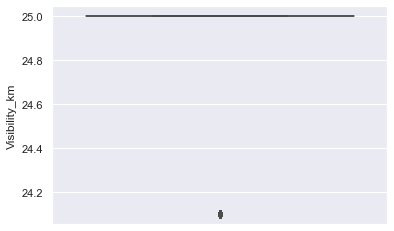

In [26]:
sns.boxplot(y="Visibility_km",data=df)

## Analysis

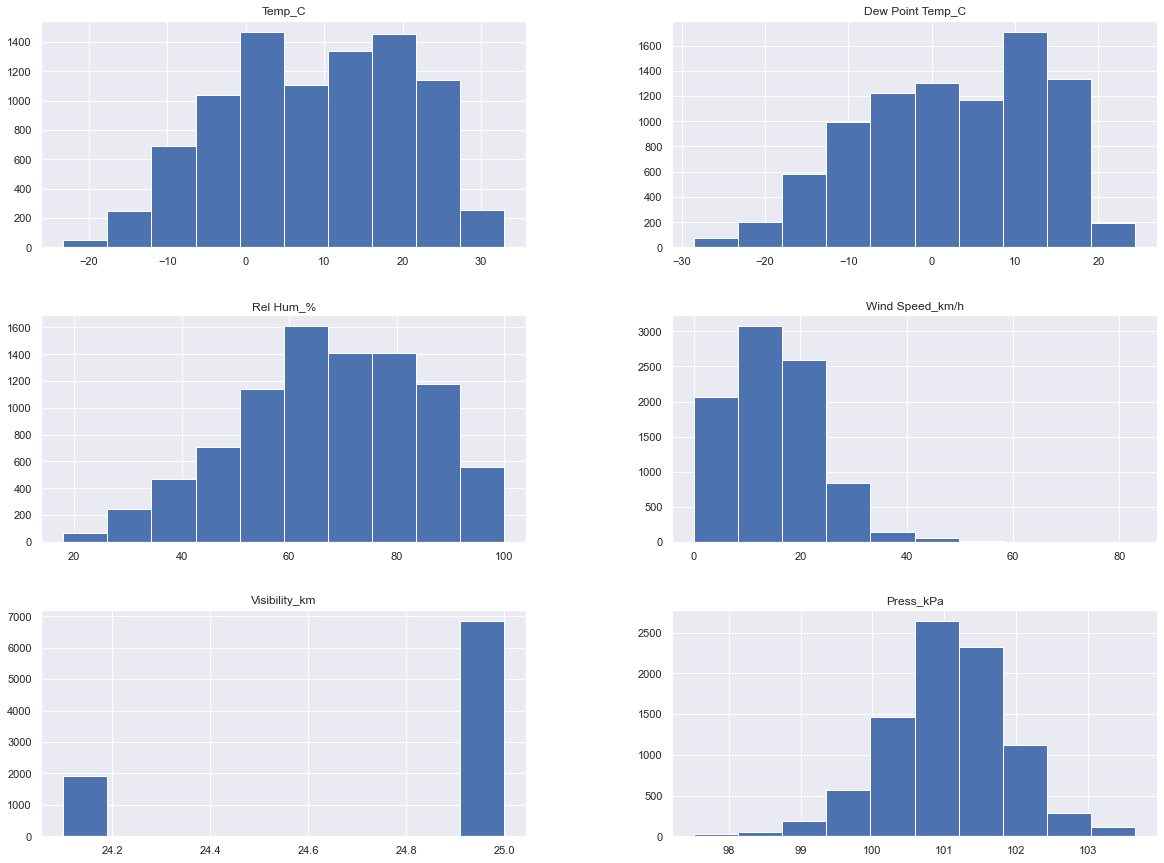

In [27]:
df.hist(figsize=(20,15))
plt.show()

In [28]:
df.columns

Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather'],
      dtype='object')

In [29]:
df["Wind Speed_km/h"].unique()

array([ 4,  7,  6,  9, 15, 13, 20, 22, 19, 24, 30, 35, 39, 32, 33, 26, 44,
       43, 48, 37, 28, 17, 11,  0, 83, 70, 57, 46, 41, 52, 50, 63, 54,  2],
      dtype=int64)

In [30]:
df["Wind Speed_km/h"].nunique()

34

In [31]:
df["Wind Speed_km/h"].median()

13.0

In [32]:
df[df["Wind Speed_km/h"]==13]

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
13,1/1/2012 13:00,0.2,-1.7,87,13,25.0,100.58,Fog
16,1/1/2012 16:00,2.6,-0.2,82,13,25.0,99.93,Mostly Cloudy
17,1/1/2012 17:00,3.0,0.0,81,13,25.0,99.81,Cloudy
72,1/4/2012 0:00,-17.5,-24.2,56,13,25.0,101.88,Mostly Cloudy
75,1/4/2012 3:00,-18.5,-24.6,59,13,25.0,101.88,Mainly Clear
...,...,...,...,...,...,...,...,...
8712,12/29/2012 0:00,-11.6,-13.5,86,13,25.0,101.35,Mainly Clear
8714,12/29/2012 2:00,-11.8,-13.1,90,13,25.0,101.33,Clear
8736,12/30/2012 0:00,-9.6,-11.3,87,13,25.0,100.23,"Snow,Fog"
8740,12/30/2012 4:00,-9.3,-10.6,90,13,25.0,100.28,"Snow,Fog"


In [33]:
df["Weather"].unique()

array(['Fog', 'Freezing Drizzle,Fog', 'Mostly Cloudy', 'Cloudy', 'Rain',
       'Rain Showers', 'Mainly Clear', 'Snow Showers', 'Snow', 'Clear',
       'Freezing Rain,Fog', 'Freezing Rain', 'Freezing Drizzle',
       'Rain,Snow', 'Moderate Snow', 'Freezing Drizzle,Snow',
       'Freezing Rain,Snow Grains', 'Snow,Blowing Snow', 'Freezing Fog',
       'Haze', 'Rain,Fog', 'Drizzle,Fog', 'Drizzle',
       'Freezing Drizzle,Haze', 'Freezing Rain,Haze', 'Snow,Haze',
       'Snow,Fog', 'Snow,Ice Pellets', 'Rain,Haze', 'Thunderstorms,Rain',
       'Thunderstorms,Rain Showers', 'Thunderstorms,Heavy Rain Showers',
       'Thunderstorms,Rain Showers,Fog', 'Thunderstorms',
       'Thunderstorms,Rain,Fog',
       'Thunderstorms,Moderate Rain Showers,Fog', 'Rain Showers,Fog',
       'Rain Showers,Snow Showers', 'Snow Pellets', 'Rain,Snow,Fog',
       'Moderate Rain,Fog', 'Freezing Rain,Ice Pellets,Fog',
       'Drizzle,Ice Pellets,Fog', 'Drizzle,Snow', 'Rain,Ice Pellets',
       'Drizzle,Snow,Fog', 

In [34]:
df["Weather"].nunique()

50

In [35]:
df.groupby("Weather").get_group("Clear")

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
67,1/3/2012 19:00,-16.9,-24.8,50,24,25.0,101.74,Clear
114,1/5/2012 18:00,-7.1,-14.4,56,11,25.0,100.71,Clear
115,1/5/2012 19:00,-9.2,-15.4,61,7,25.0,100.80,Clear
116,1/5/2012 20:00,-9.8,-15.7,62,9,25.0,100.83,Clear
117,1/5/2012 21:00,-9.0,-14.8,63,13,25.0,100.83,Clear
...,...,...,...,...,...,...,...,...
8646,12/26/2012 6:00,-13.4,-14.8,89,4,25.0,102.47,Clear
8698,12/28/2012 10:00,-6.1,-8.6,82,19,24.1,101.27,Clear
8713,12/29/2012 1:00,-11.9,-13.6,87,11,25.0,101.31,Clear
8714,12/29/2012 2:00,-11.8,-13.1,90,13,25.0,101.33,Clear


In [36]:
df.groupby("Weather").get_group("Snow").head(5)

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
55,1/3/2012 7:00,-14.0,-19.5,63,19,25.0,100.95,Snow
84,1/4/2012 12:00,-13.7,-21.7,51,11,24.1,101.25,Snow
86,1/4/2012 14:00,-11.3,-19.0,53,7,25.0,100.97,Snow
87,1/4/2012 15:00,-10.2,-16.3,61,11,25.0,100.89,Snow
88,1/4/2012 16:00,-9.4,-15.5,61,13,25.0,100.79,Snow


In [37]:
df["Weather"].value_counts()

Mainly Clear                               2106
Mostly Cloudy                              2069
Cloudy                                     1728
Clear                                      1326
Snow                                        390
Rain                                        306
Rain Showers                                188
Fog                                         150
Rain,Fog                                    116
Drizzle,Fog                                  80
Snow Showers                                 60
Drizzle                                      41
Snow,Fog                                     37
Snow,Blowing Snow                            19
Rain,Snow                                    18
Thunderstorms,Rain Showers                   16
Haze                                         16
Drizzle,Snow,Fog                             15
Freezing Rain                                14
Freezing Drizzle,Snow                        11
Freezing Drizzle                        

In [38]:
df.columns

Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather'],
      dtype='object')

In [39]:
df["Visibility_km"].mean()

24.80317622950909

In [40]:
df[df["Visibility_km"]==25].head(5)

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,25.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,25.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,25.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,25.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,25.0,101.23,Fog


In [41]:
df["Press_kPa"].std()

0.8440047459486474

In [42]:
df["Press_kPa"].max()

103.65

In [43]:
df["Press_kPa"].min()

97.52

In [44]:
(df["Press_kPa"]==103) & (df["Press_kPa"]==97)

0       False
1       False
2       False
3       False
4       False
        ...  
8779    False
8780    False
8781    False
8782    False
8783    False
Name: Press_kPa, Length: 8784, dtype: bool

In [45]:
(df["Press_kPa"]==103) | (df["Press_kPa"]==97)

0       False
1       False
2       False
3       False
4       False
        ...  
8779    False
8780    False
8781    False
8782    False
8783    False
Name: Press_kPa, Length: 8784, dtype: bool

In [46]:
df[df["Press_kPa"]==103]

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
1567,3/6/2012 7:00,-14.8,-20.7,61,11,25.0,103.0,Clear
7658,11/15/2012 2:00,-2.3,-5.1,81,13,25.0,103.0,Mainly Clear
7660,11/15/2012 4:00,-3.6,-6.3,82,9,25.0,103.0,Clear


In [47]:
df.groupby("Weather").mean()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
Weather,,,,,,
Clear,6.825716,0.089367,64.497738,10.557315,24.922624,101.587443
Cloudy,7.970544,2.375810,69.592593,16.127315,24.697917,100.911441
Drizzle,7.353659,5.504878,88.243902,16.097561,24.692683,100.435366
"Drizzle,Fog",8.067500,7.033750,93.275000,11.862500,25.000000,100.786625
"Drizzle,Ice Pellets,Fog",0.400000,-0.700000,92.000000,20.000000,25.000000,100.790000
"Drizzle,Snow",1.050000,0.150000,93.500000,14.000000,25.000000,100.890000
"Drizzle,Snow,Fog",0.693333,0.120000,95.866667,15.533333,25.000000,99.281333
Fog,4.303333,3.159333,92.286667,7.946667,25.000000,101.184067
Freezing Drizzle,-5.657143,-8.000000,83.571429,16.571429,25.000000,100.202857


In [48]:
df.columns

Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather'],
      dtype='object')

In [49]:
corr=df.corr()

In [50]:
corr

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
Temp_C,1.000000,0.932714,-0.220182,-0.061876,-0.118472,-0.236389
Dew Point Temp_C,0.932714,1.000000,0.139494,-0.095685,-0.135254,-0.320616
Rel Hum_%,-0.220182,0.139494,1.000000,-0.092743,0.000037,-0.231424
Wind Speed_km/h,-0.061876,-0.095685,-0.092743,1.000000,-0.109291,-0.356613
Visibility_km,-0.118472,-0.135254,0.000037,-0.109291,1.000000,0.095504
Press_kPa,-0.236389,-0.320616,-0.231424,-0.356613,0.095504,1.000000


<AxesSubplot:>

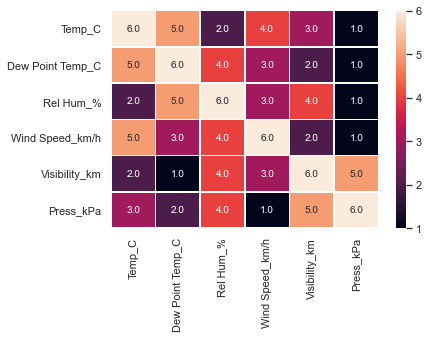

In [51]:
sns.heatmap(corr.rank(axis="columns"),annot=True,fmt=".1f",linewidths=.5)

In [52]:
df.to_csv("Weather Data Update")